In [1]:
from ctgomartini.api import MartiniTopFile
import os
import networkx as nx


In [2]:
working_path = "/home/ys/CommonUse/Martini/CTGoMartini/tests/data/UmbrellaSampling/GlnBP/openmm"
os.chdir(working_path)

In [3]:
top = MartiniTopFile('system.top')
top = top.moleculeTypes['gbp_open']._topology

In [4]:
def isBB(atomid, top):
    return top['atoms'][atomid-1][4] == 'BB'


In [14]:
# Create a sample graph
G = nx.Graph()
for item in top['constraints']:
    atomid1 = int(item[0])
    atomid2 = int(item[1])
    if isBB(atomid1, top) and isBB(atomid2, top):
        G.add_edge(int(item[0]), int(item[1]))
    #  G.add_edge(int(item[0]), int(item[1]))

constraint_set = set()
for i in list(G.nodes.keys()):
    # Specify the starting node
    start_node = i

    # Use BFS to find nodes at a distance of 2 from the starting node
    nodes_at_distance_2 = list(nx.single_source_shortest_path_length(G, source=start_node, cutoff=2).keys())

    # Filter out nodes that are directly connected to the starting node
    nodes_separated_by_2_bonds = [node for node in nodes_at_distance_2 if G.has_edge(start_node, node) is False and start_node != node]

    for node in nodes_separated_by_2_bonds:
        constraint_set.add(tuple(sorted([start_node, node])))

In [15]:
bond_set = set()
for item in top['bonds']:
    bond_set.add(tuple(sorted([int(item[0]), int(item[1])])))

angle_set = set()
for item in top['angles']:
    angle_set.add(tuple(sorted([int(item[0]), int(item[2])])))
    angle_set.add(tuple(sorted([int(item[0]), int(item[1])])))
    angle_set.add(tuple(sorted([int(item[1]), int(item[2])])))

In [16]:
for item in constraint_set:
    if item not in bond_set and item not in angle_set:
        print(item)

In [ ]:
aaaa

In [ ]:
# Specify the starting node
start_node = 1

# Use BFS to find nodes at a distance of 2 from the starting node
nodes_at_distance_2 = list(nx.single_source_shortest_path_length(G, source=start_node, cutoff=2).keys())

# Filter out nodes that are directly connected to the starting node
nodes_separated_by_2_bonds = [node for node in nodes_at_distance_2 if G.has_edge(start_node, node) is False and start_node != node]

print("Nodes separated by 2 bonds from node", start_node, ":", nodes_separated_by_2_bonds)

top['constraints']

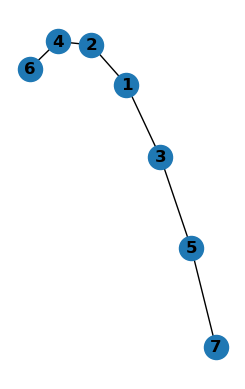

In [ ]:
import networkx as nx

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7)])

# Specify the starting node
start_node = 1

# Use BFS to find nodes at a distance of 2 from the starting node
nodes_at_distance_2 = list(nx.single_source_shortest_path_length(G, source=start_node, cutoff=2).keys())

# Filter out nodes that are directly connected to the starting node
nodes_separated_by_2_bonds = [node for node in nodes_at_distance_2 if G.has_edge(start_node, node) is False and start_node != node]

print("Nodes separated by 2 bonds from node", start_node, ":", nodes_separated_by_2_bonds)



import matplotlib.pyplot as plt

subax1 = plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')

